In [1]:
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
import gensim
import numpy as np

In [2]:
# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

data = pd.read_csv('comments.csv')

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with a single space
    text = text.lower()  # Convert to lower case
    tokens = word_tokenize(text)  # Tokenize
    return tokens

# Function to identify pronouns in text
def identify_pronouns(tokens):
    tagged = pos_tag(tokens)  # Tag tokens with part of speech
    pronouns = [word for word, tag in tagged if tag == 'PRP' or tag == 'PRP$']  # Extract pronouns
    return pronouns

# Apply cleaning and pronoun identification to the comments
data['cleaned_comments'] = data['comment_body'].apply(clean_and_tokenize)
data['pronouns'] = data['cleaned_comments'].apply(identify_pronouns)

# Get the overall pronoun usage
all_pronouns = [pronoun for sublist in data['pronouns'] for pronoun in sublist]
pronoun_counts = Counter(all_pronouns)

pronoun_counts.most_common()  # Display the most common pronouns


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xinyangshao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xinyangshao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xinyangshao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('it', 22882),
 ('you', 13824),
 ('they', 12076),
 ('we', 9516),
 ('my', 4101),
 ('your', 3644),
 ('their', 3465),
 ('them', 2710),
 ('us', 2613),
 ('me', 2249),
 ('our', 1469),
 ('he', 1433),
 ('its', 1131),
 ('she', 651),
 ('his', 551),
 ('her', 436),
 ('themselves', 252),
 ('him', 246),
 ('s', 236),
 ('myself', 183),
 ('itself', 172),
 ('yourself', 134),
 ('himself', 34),
 ('ourselves', 26),
 ('self', 18),
 ('theirs', 9),
 ('t', 8),
 ('yeah', 6),
 ('okay', 5),
 ('herself', 4),
 ('ok', 4),
 ('yes', 4),
 ('oh', 3),
 ('oxford', 3),
 ('https', 3),
 ('op', 3),
 ('ve', 2),
 ('ya', 2),
 ('o', 2),
 ('nz', 2),
 ('shelf', 2),
 ('org', 2),
 ('ours', 2),
 ('y', 2),
 ('one', 2),
 ('haha', 1),
 ('online', 1),
 ('i', 1),
 ('india', 1),
 ('hpv', 1),
 ('bother', 1),
 ('hell', 1),
 ('ows', 1),
 ('ll', 1),
 ('alone', 1),
 ('herd', 1),
 ('spread', 1),
 ('moderna', 1),
 ('mrna', 1),
 ('yours', 1),
 ('mine', 1),
 ('hesitancy', 1),
 ('ymmv', 1),
 ('m', 1),
 ('yay', 1),
 ('oann', 1),
 ('oshkosh', 1),
 ('y

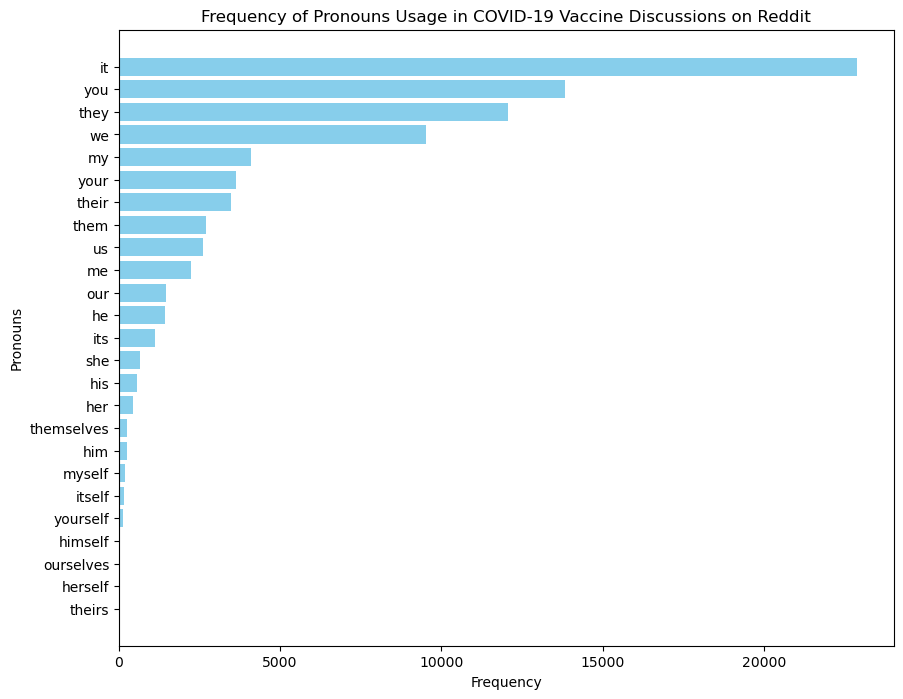

In [3]:
# Provided list of pronoun frequencies, cleaned to remove non-pronouns and corrected
cleaned_pronoun_freq = {
    'it': 22882, 'you': 13824, 'they': 12076, 'we': 9516, 'my': 4101, 'your': 3644, 
    'their': 3465, 'them': 2710, 'us': 2613, 'me': 2249, 'our': 1469, 'he': 1433, 
    'its': 1131, 'she': 651, 'his': 551, 'her': 436, 'themselves': 252, 'him': 246, 
    'myself': 183, 'itself': 172, 'yourself': 134, 'himself': 34, 'ourselves': 26, 
    'herself': 4, 'theirs': 9
}

# Create a bar chart for the pronoun frequencies
plt.figure(figsize=(10, 8))
plt.barh(list(cleaned_pronoun_freq.keys()), list(cleaned_pronoun_freq.values()), color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Pronouns')
plt.title('Frequency of Pronouns Usage in COVID-19 Vaccine Discussions on Reddit')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [ ]:
# # 数据预处理函数
# def simple_clean_and_tokenize(text):
#     text = re.sub(r'http\S+', '', text)
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     text = text.lower()
#     return text.split()

# 清洗数据
# data['cleaned_comments'] = data['comment_body'].apply(clean_and_tokenize)

# nltk.download('stopwords')  # 只需要下载一次
stop_words = set(stopwords.words('english'))

# 更新您的数据预处理函数以移除停用词
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# 应用停用词移除
data['cleaned_comments_no_stopword'] = data['cleaned_comments'].apply(remove_stopwords)

# 创建字典和语料库
dictionary = corpora.Dictionary(data['cleaned_comments_no_stopword'])
corpus = [dictionary.doc2bow(text) for text in data['cleaned_comments_no_stopword']]

# 运行LDA模型
num_topics = 10  # 您可以调整这个数字来更改话题的数量
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 显示识别的话题
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)


In [ ]:
# Define the list of pronouns
pronouns_list = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours',
                 'you', 'your', 'yours', 'he', 'him', 'his', 'she', 'her', 'hers',
                 'it', 'its', 'they', 'them', 'their', 'theirs']

# Define positive and negative keywords related to vaccine sentiment
positive_vaccine_keywords = ['willing', 'accept', 'pro-vaccine', 'agree', 'support', 'ready', 'happy', 'eager', 'yes', 'consent']
negative_vaccine_keywords = ['unwilling', 'refuse', 'anti-vaccine', 'disagree', 'oppose', 'hesitant', 'no', 'reject', 'doubt', 'fear']

In [ ]:
# Classify comments based on sentiment
data['positive_sentiment'] = data['comment_body'].apply(lambda x: any(keyword in x.lower() for keyword in positive_vaccine_keywords))
data['negative_sentiment'] = data['comment_body'].apply(lambda x: any(keyword in x.lower() for keyword in negative_vaccine_keywords))

# Separate comments based on sentiment
positive_comments = data[data['positive_sentiment']]['cleaned_comments']
negative_comments = data[data['negative_sentiment']]['cleaned_comments']

In [ ]:
# Count pronouns for each sentiment group
def count_pronouns(comments, pronouns_list):
    return Counter([pronoun for comment in comments for pronoun in comment if pronoun in pronouns_list])

positive_pronouns_counts = count_pronouns(positive_comments, pronouns_list)
negative_pronouns_counts = count_pronouns(negative_comments, pronouns_list)

# Calculate the total number of words for each sentiment group
total_words_positive = sum(len(comment) for comment in positive_comments)
total_words_negative = sum(len(comment) for comment in negative_comments)

# Calculate the relative frequency of each pronoun (number of occurrences per 1000 words)
relative_freq_positive = {pronoun: (count / total_words_positive * 1000) for pronoun, count in positive_pronouns_counts.items()}
relative_freq_negative = {pronoun: (count / total_words_negative * 1000) for pronoun, count in negative_pronouns_counts.items()}

# Create a dataframe for the relative frequencies
relative_comparison = pd.DataFrame({
    'Pronoun': pronouns_list,
    'Willing (per 1000 words)': [relative_freq_positive.get(pronoun, 0) for pronoun in pronouns_list],
    'Unwilling (per 1000 words)': [relative_freq_negative.get(pronoun, 0) for pronoun in pronouns_list]
}).sort_values(by='Willing (per 1000 words)', ascending=False)

# Create a bar chart for comparison
ind = np.arange(len(relative_comparison))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(ind - width/2, relative_comparison['Willing (per 1000 words)'], width, label='Willing to Vaccinate')
rects2 = ax.bar(ind + width/2, relative_comparison['Unwilling (per 1000 words)'], width, label='Unwilling to Vaccinate')

ax.set_ylabel('Frequency per 1000 words')
ax.set_title('Comparison of Relative Pronoun Usage Between Groups')
ax.set_xticks(ind)
ax.set_xticklabels(relative_comparison['Pronoun'])
ax.legend()

fig.tight_layout()
plt.show()